Mean Squared Error: 1.6850665602052808
       Actual  Predicted
9456      3.3   5.947059
14816     5.3   5.499920
3213      5.7   5.208473
3778      7.2   5.746348
5775      3.5   5.777417


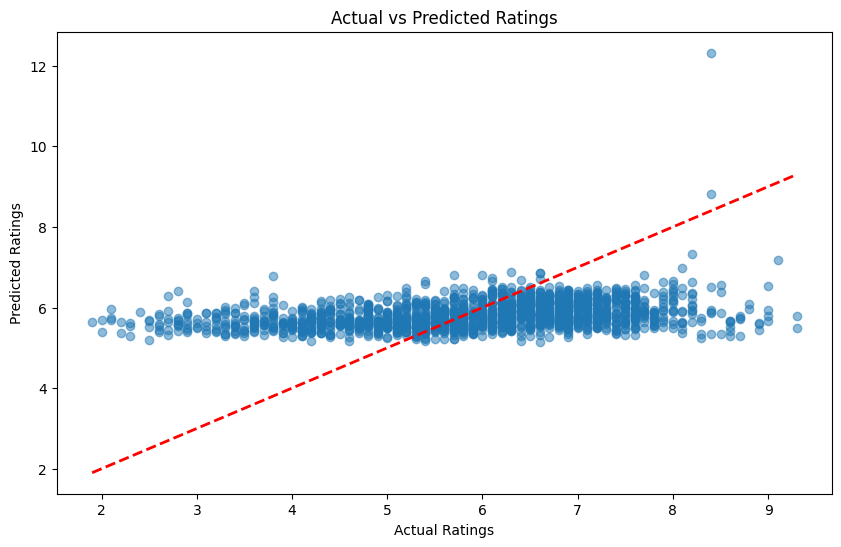

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the movie data from the CSV file
file_path = 'IMDb Movies India.csv'
movie_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Remove rows where the 'Rating' column is missing
movie_data = movie_data.dropna(subset=['Rating'])

# Remove commas from the 'Votes' column and convert it to a number
movie_data['Votes'] = movie_data['Votes'].str.replace(',', '').astype(float)

# Fill in missing 'Votes' values with the median number of votes
movie_data['Votes'] = movie_data['Votes'].fillna(movie_data['Votes'].median())

# Extract the year from the 'Year' column and convert it to a number
movie_data['Year'] = movie_data['Year'].str.extract('(\d{4})').astype(float)

# Fill in missing 'Duration' values with the most common value and convert to a number
movie_data['Duration'] = movie_data['Duration'].fillna(movie_data['Duration'].mode()[0])
movie_data['Duration'] = movie_data['Duration'].apply(lambda x: int(x.split()[0]))

# Convert text categories to numbers
label_encoders = {}
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    movie_data[column] = label_encoders[column].fit_transform(movie_data[column].astype(str))

# Choose the columns we'll use for prediction (features) and the column we want to predict (target)
features = ['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']
target = 'Rating'

X = movie_data[features]
y = movie_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and train it on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error of the model's predictions
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Show the first few actual vs predicted ratings
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

# Plot the actual ratings against the predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()
